In [1]:
# Voer dit blok code uit door met de cursor in het blok te klikken, en vervolgens SHIFT+ENTER in te drukken.

import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

from IPython.display import HTML
from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout


%matplotlib inline

style = {'description_width': '200px'}
slider_layout = Layout(width='50%')

# Hoofdstuk 5- Warmte

De temperatuur van een systeem kan veranderd worden door een hoeveelheid warmte, $Q\,\left[\text{J}\right]$, toe of af te voeren, of door warmte te produceren binnen het systeem, bijvoorbeeld door wrijving of het doorgaan van endo- of exotherme reacties. 

<img src="figs/model_warmte.png" width=300 />


De specifieke warmtecapaciteit, $c\,\left[\text{J}\text{kg}^{-1}\text{K}^{-1}\right]$, geeft aan hoeveel warmte men moet toevoegen om een kilogram van een bepaalde stof met één kelvin op te warmen. Men maakt, vooral bij gassen, ook een onderscheid tussen de hoeveelheid toe te voegen warmte wanneer een constant volume, $c_v$, wordt aangehouden, of wanneer een constante druk, $c_p$, bewaard blijft.

Stel nu dat de hoeveelheid warmte die een systeem van $m\,\left[\text{kg}\right]$ met specifieke warmtecapaciteit $c_p\,\left[\text{J}\text{kg}^{-1}\text{K}^{-1}\right]$, bevat, wordt aangepast van waarde $Q_1\,\left[\text{J}\right]$ naar $Q_2\,\left[\text{J}\right]$, waar we $\Delta Q \equiv Q_2 - Q_1$ definiëren. Daar de specifieke warmtecapaciteit aangeeft hoeveel warmte we per kilogram van een stof moeten toevoegen opdat de temperatuur van deze stof met één kelvin zou stijgen, dan weten we dat deze warmteverandering de temperatuur van het voorwerp van $T_1$ naar $T_2$ brengt, en dat dit verschil, $\Delta T = T_2 - T_1$, aan het verschil in warmte kan gerelateerd worden via:
    
$$
    \Delta Q = m c_p \Delta T.
$$
    
    
Dit controleren we nog eens door vast te stellen dan de eenheden in linker- en rechterlid inderdaad overeenstemmen.
    
Stel nu dat per infinitesimaal kleine tijdseenheid, $dt$, de hoeveelheid warmte in het systeem met een infinitesimaal kleine hoeveelheid, $dQ$, verandert, dan kan dat aan een infinitesimaal kleine verandering in temperatuur per tijdseenheid gelinkt worden:
    
$$
    \dfrac{d Q}{d t} = m c_p \dfrac{d T}{d t}.
$$
    
We zien nu hoe een warmteverandering een differentiaalvergelijking voor de verandering van de temperatuur kan opleveren. Nu moeten we nog uitdrukkingen vinden die modelleren hoe warmte aan een systeem toegevoegd of onttrokken kan worden, of hoe er warmte binnen een systeem kan worden geproduceerd.

We warme aan een systeem toevoegen, of warme uit het systeem afvoeren, door het in contact te brengen met een warmere of koudere omgeving. De afkoelwet van Newton vertelt ons de snelheid waarmee warmte een voorwerp verlaat door contact men een omgeving op een andere temperatuur. Volgens deze wet wordt de warmtetransfer, $q \, \left[\text{W} \equiv \text{J}\text{s}^{-1}\right]$, van een voorwerp op temperatuur $T\,\left[\text{K}\right]$ naar een omgeving op temperatuur $T_\text{om}\,\left[\text{K}\right]$ gegeven door
    
$$
    q = h A \left(T - T_\text{om}\right),
$$
    
met $h \, \left[\text{W}\text{m}^{-2}\text{K}^{-1}\right]$ de warmtetransfercoëfficiënt en $A\,\left[\text{m}^2\right]$ de contactoppervlakte tussen het voorwerp en de omgeving. De warmtetransfercoëfficiënt is een eigenschap van het voorwerp, en vertelt ons hoe goed het materiaal waaruit dit voorwerp is opgebouwd warmte kan doorgeven. Hoe groter het contactoppervlakte tussen het voorwerp en de omgeving, hoe sneller er warmte kan worden doorgegeven.

Ga na dat indien $T_\text{om}<T$ er inderdaad een positieve warmtetransfer is van het voorwerp naar de omgeving, wat overeenstemt met de realiteit, terwijl indien $T_\text{om}>T$ een negatieve warmtetransfer is van het voorwerp naar de omgeving, of dus een positieve warmtetransfer van omgeving naar voorwerp.

## 5.1- Een ovenschotel

We zetten een ovenschotel op kamertemperatuur, $T_s(t=0)=293.15\,\text{K}$, in een voorverwarmde oven van $T_o = 513.15\,\text{K}$. We onderstellen dat de temperatuur en druk in de oven constant blijven wanneer de schotel in de oven wordt geplaatst, en opwarmt. Onderstel ook dat alle warmte die aan de schotel wordt toegevoegd, onmiddellijk uniform over de hele schotel verdeeld wordt, dus dat de oppervlaktes van de ovenschotel steeds even warm hebben als de kern (Als we deze assumptie niet maken, moeten we ook rekening houden met temperatuurverschillen in de ovenschotel, en wordt het vraagstuk veel moeilijker moeilijker).

De ovenschotel heeft een specifieke warmtecapaciteit van $c_p = 3430 \text{J}\text{kg}^{-1}\text{K}^{-1}$, een warmtetransfercoëfficiënt van $194\,\text{W}\text{m}^{-2}\text{K}^{-1}$, is een perfecte balk met dimensies $20 \times 10 \times 5 \,\text{cm}$, en weegt $2\,\text{kg}$.
    	
Stel een warmtevergelijking op, die uitdrukt hoe de temperatuur van de schotel wijzigt doorheen de tijd.
    	
    	
We beschouwen de ovenschotel als een systeem dat warmte ontvangt uit de warmere omgeving, maar waarin intern geen warmte wordt geproduceerd.
    	
Via de vergelijkingen in bovenstaande sectie vinden we hoeveel warmte per seconde van de ovenschotel naar de omgeving gaat:
    	
$$
    	q = h A \left(T_\text{s} - T_\text{o}\right),
$$
    	
of, equivalent, dat de hoeveelheid warmte die van de omgeving naar de ovenschotel gaat wordt gegeven door
    	
$$
    	-q = h A \left(T_\text{o} - T_\text{s}\right).
$$
    	
Combineren we deze uitdrukking met $\dfrac{d Q}{d t} = m c_p \dfrac{d T}{d t}$, dan komen we tot

$$
    	\begin{align}
    	& & m c_p \dfrac{d T_s}{d t} &= h A \left(T_\text{o} - T_\text{s}\right), \\
    	&\Leftrightarrow& \dfrac{d T_s}{d t} &= \dfrac{h A}{m c_p} \left(T_\text{o} - T_\text{s}\right).
    	\end{align}
$$


We controleren de redelijkheid van deze vergelijkingen door na te gaan of linker- en rechterlid dezelfde eenheden hebben, en door vast te stellen dat wanneer $T_o > T_s$, de temperatuur van de ovenschotel inderdaad stijgt, omdat $\dfrac{d T_s}{d t}>0$.
    	
We kunnen nu het temperatuurverloop van de ovenschotel te weten komen door deze vergelijking op te lossen:

$$
\begin{align}
 &&   	\dfrac{d T_s}{d t} &= \dfrac{h A}{m c_p} \left(T_\text{o} - T_\text{s}\right),\\
 &\Leftrightarrow&    	\dfrac{1}{T_\text{o} - T_\text{s}} \dfrac{d T_s}{d t} &= \dfrac{h A}{m c_p},\\
  &\Leftrightarrow&   	\int_{T_s(0)}^{T_s(t)}\dfrac{1}{T_\text{o} - T_\text{s}} d T_s &= \int_{0}^{t} \dfrac{h A}{m c_p} dt,\\
 &\Leftrightarrow&    	\left[-\ln \left(T_\text{o} - T_\text{s}\right)\right]_{T_s(0)}^{T_s(t)} &= \left[\dfrac{h A}{m c_p}\right]_{0}^{t},\\
 &\Leftrightarrow&    	\left[-\ln \left(T_\text{o} - T_s\right)\right] - \left[-\ln \left(T_\text{o} - T_s(0)\right)\right] &= \dfrac{h A}{m c_p}t,\\
 &\Leftrightarrow&    	- \ln \left(T_\text{o} - T_s\right) &= \dfrac{h A}{m c_p}t - \ln \left(T_\text{o} - T_s(0)\right),\\
&\Leftrightarrow&     	\ln \left(T_\text{o} - T_s\right)&= - \dfrac{h A}{m c_p}t + \ln \left(T_\text{o} - T_s(0)\right),\\
 &\Leftrightarrow&    	T_\text{o} - T_s&= e^{-\dfrac{h A}{m c_p}t + \ln \left(T_\text{o} - T_s(0)\right)},\\
 &\Leftrightarrow&    	T_\text{o} - T_s&= \left(T_\text{o} - T_s(0)\right) e^{-\dfrac{h A}{m c_p}t},\\
 &\Leftrightarrow&    	T_s&= \left(T_s(0) - T_\text{o}\right) e^{-\dfrac{h A}{m c_p}t} + T_\text{o}.\\
    	\end{align}     
$$
        
We gebruiken de gegevens $T_s(0) = 293.15$, $T_o = 513.15$, $h=194$, $c_p = 3430$, $m=2$ en $A = 2 \times \left(0.20\times 0.10 + 0.20\times0.05 + 0.10\times0.05\right) = 0.07$ (Opgelet: daar alle parameters in de opgestelde differentiaalvergelijking de lengte-eenheid meter gebruiken, dienen we ook de totale oppervlakte van de ovenschotel in vierkante meter om te zetten), en bovenstaande uitkomst om onderstaande figuur te bekomen.

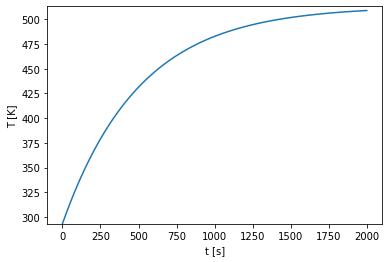

In [2]:
tijdstippen= np.linspace(0,2000,100)

Ts0=293.15
To=513.15
cp=3430
m=2
h=194
A=0.07


def Ts(t):
    return (Ts0-To)*np.exp(-h*A/m/cp*t)+To
    
           
plt.plot(tijdstippen, Ts(tijdstippen))
plt.xlabel('t [s]')
plt.ylabel('T [K]')
plt.ylim([Ts0,To])
plt.show()

In [3]:
tijdstippen= np.linspace(0,2000,100)

Ts0=293.15
To=513.15
cp=3430
m=2

def animatie(A,h,m,cp):
    
    def Ts(t):
        return (Ts0-To)*np.exp(-h*A/m/cp*t)+To
    
           
    plt.plot(tijdstippen, Ts(tijdstippen))
    plt.xlabel('t [s]')
    plt.ylabel('T [K]')
    plt.ylim([Ts0,To])
  
interact(animatie
        ,A=FloatSlider(min=0.01, max=0.1, step=0.01, value=0.07, description='$A$')
        ,h=FloatSlider(min=100, max=300, step=50, value=200, description='$h$')
        ,m=FloatSlider(min=1, max=5, step=1, value=2, description='$m$')
        ,cp=FloatSlider(min=1000, max=4000, step=500, value=3500, description='$cp$'));

interactive(children=(FloatSlider(value=0.07, description='$A$', max=0.1, min=0.01, step=0.01), FloatSlider(va…

* Hoe kan het verloop van de curve intuïtief aan een verandering in de parameterwaarden gelinkt worden?

Wanneer de massa, $m$, of de warmtecapaciteit, $c_p$, verkleinen, is er minder warmte nodig om dezelfde temperatuursverandering te veroorzaken. Terzelfdertijd hebben deze parameters geen invloed op de snelheid van de warmtetransfer, want $q = h A \left(T_\text{s} - T_\text{o}\right)$. Er wordt dus even snel warmte toegevoegd, maar deze verhoogt de temperatuur in de ovenschotel sneller.

Wanneer de warmtetransfercoëfficiënt, $h$, of het contactoppervlak tussen ovenschotel en omgeving, $A$, groter wordt, kan de warmte sneller naar de ovenschotel worden overgedragen, want $q = h A \left(T_\text{s} - T_\text{o}\right)$.

## 5.2- Een chemische reactie

Beschouwen we het acetylaceton uit [Hoofdstuk 2](./H2-Reactiekinetiek.ipynb), dat in waterige oplossing deels een reversibele reactie ondergaat, zodat het acetylaceton als een combinatie van ketonen en alcoholen aanwezig is. 

<img src="figs/tikz/activatieenergie/ketoenolreactie.png" width=600 />

Wanneer in een perfect gemengd recipiënt van volume $V\,\left[\text{l}\right]$, gevuld met zuiver water, $[K](0)$ mol acetylaceton, in de ketonvorm, wordt opgelost, leerde Hoofdstuk 2 ons dat de concentratie ketonvorm in oplossing gegeven wordt door 

$$
	\dfrac{d \left[K\right]}{d t } = -k_1 \left[K\right] + k_2 \left[A\right],
$$

en concentratie van de alcoholvorm dan eenvoudig gevonden wordt via

$$
    \left[A\right] = [K](0) - \left[K\right].
$$



Wanneer een reactie doorgaat onder omstandigheden van constante temperatuur en druk, 